# Data Consolidattion 

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#!pip install geopandas
#!pip install geopy
from geopy.geocoders import Nominatim
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
filenames_2019 = all_filenames[:6]

filenames_2020_2021 = all_filenames[6:]

In [4]:
#combine all files in the list
df_19 = pd.concat([pd.read_csv(f) for f in filenames_2019 ])

df_20_21 = pd.concat([pd.read_csv(f) for f in filenames_2020_2021 ])

In [5]:
# Create 4 empty columns in 2019 data

df_19['start_lat'] = " "
df_19['start_lng'] = " "
df_19['end_lat'] = " "
df_19['end_lng'] = " "

df_19['ride_id'] = " "
df_19['rideable_type'] = " "


In [6]:
# Create functions for geocoding 

def extract_lat(address):
    try:
        location = geolocator.geocode(address)
        return location.latitude
    except:
        return ''

    
def extract_long(address):
    try:
        location = geolocator.geocode(address)
        return location.longitude
    except:
        return ''

In [7]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="example app")

### Make the same columns for all datasets 

In [24]:
df_19 = df_19.loc[:, ["ride_id","rideable_type","Start date","End date", "Start station", "Start station number"
           ,"End station", "End station number",'start_lat', 'start_lng', 'end_lat', 'end_lng','Member type','Bike number','Duration']]


df_19.columns = ['ride_id', 'rideable_type', 'started_at', 'ended_at','start_station_name', 'start_station_id', 
                 'end_station_name','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng','member_casual', 'Bike number', 'Duration']


In [26]:
# Add columns in 2020_2021 data 

df_20_21['Bike number']= ""

#convert columns to datetime
df_20_21[['started_at','ended_at']] = df_20_21[['started_at','ended_at']].apply(pd.to_datetime)

#calculate difference between dates
df_20_21['Duration'] = (df_20_21['ended_at'] - df_20_21['started_at']) / np.timedelta64(1, 's')


In [41]:
# Change the wording in order to be aligned

df_19["member_casual"] = df_19["member_casual"].map(lambda x: "member" if x=="Member" else "casual")

### Consolidate all data 

In [43]:
df = pd.concat([df_19, df_20_21])

In [69]:
# Add semi annual column 

df[['started_at','ended_at']] = df[['started_at','ended_at']].apply(pd.to_datetime)

df['semi_annual'] = df['started_at'].map(lambda x:"H2 2019" if x.year==2019 else ("H2 2020" if x.year==2020 else "H2 2021"))


In [71]:
#export to csv
df.to_csv( "data.csv", index=False)

### Import data 

In [2]:
df = pd.read_csv("data.csv")

C:\Users\Tsaro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (8,9,10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
# Missing values
df.isnull().sum()

ride_id                     6
rideable_type               0
started_at                  0
ended_at                    0
start_station_name     178663
start_station_id       178663
end_station_name       201847
end_station_id         201847
start_lat                   8
start_lng                   8
end_lat                  7553
end_lng                  7553
member_casual               0
Bike number           2895766
Duration                    0
semi_annual                 0
dtype: int64

In [3]:
np.count_nonzero(df.start_station_id.unique())

683

In [4]:
np.count_nonzero(df.end_station_id.unique())

683

In [5]:
np.count_nonzero(df.start_station_name.dropna().unique())

713

In [6]:
np.count_nonzero(df.end_station_name.dropna().unique())

713

In [7]:
start = df.start_station_name.dropna().unique()
end = df.end_station_name.dropna().unique()

In [8]:
from opencage.geocoder import OpenCageGeocode

def geo_lat(x):
    key = "18f60230b17a4b76a633dd7eb0f9ee98"
    geocoder = OpenCageGeocode(key)
    address = x
    result = geocoder.geocode(address, no_annotations="1")  
    
    return result[0]['geometry']['lat']

def geo_lng(x):
    key = "18f60230b17a4b76a633dd7eb0f9ee98"
    geocoder = OpenCageGeocode(key)
    address = x
    result = geocoder.geocode(address, no_annotations="1")  
    
    return result[0]['geometry']['lng']

In [9]:
addresses = start
key = "18f60230b17a4b76a633dd7eb0f9ee98"
geocoder = OpenCageGeocode(key)
latitudes_start = []
longitudes_start = []
for address in addresses: 
    result = geocoder.geocode(address, no_annotations="1")  
    
    if result and len(result):  
        longitude = result[0]["geometry"]["lng"]  
        latitude = result[0]["geometry"]["lat"] 
    else:  
        longitude = "N/A"  
        latitude = "N/A"  
    
    latitudes_start.append(latitude) 
    longitudes_start.append(longitude)

In [10]:
addresses = end
key = "18f60230b17a4b76a633dd7eb0f9ee98"
geocoder = OpenCageGeocode(key)
latitudes_end = []
longitudes_end = []
for address in addresses: 
    result = geocoder.geocode(address, no_annotations="1")  
    
    if result and len(result):  
        longitude = result[0]["geometry"]["lng"]  
        latitude = result[0]["geometry"]["lat"] 
    else:  
        longitude = "N/A"  
        latitude = "N/A"  
    
    latitudes_end.append(latitude) 
    longitudes_end.append(longitude)

In [11]:
df_geo = pd.DataFrame()

In [12]:
df_geo['start'] = start

In [13]:
df_geo['end'] = end

In [15]:
df_geo['start_lat'] = latitudes_start

df_geo['start_long'] = longitudes_start

df_geo['end_lat'] = latitudes_end

df_geo['end_long'] = longitudes_end


In [21]:
#export to csv
df_geo.to_csv( "geo.csv", index=False)

In [26]:
# change column names 
df_geo.columns = ['start_station_name',"end_station_name", 'start_lat', 'start_lng','end_lat','end_lng']


In [42]:
df_geo_start = df_geo[['start_station_name', 'start_lat', 'start_lng']]

df_geo_end = df_geo[['end_station_name', 'end_lat', 'end_lng']]

In [34]:
df_19 = df[df.semi_annual=="H2 2019"]

In [47]:
# Connect geocoding to dataframe of 2019 
n_df_19 = pd.merge(df_19, df_geo_start, on ='start_station_name', how ='left')

df_19_f = pd.merge(n_df_19, df_geo_end, on ='end_station_name', how ='left')

In [49]:
df_19_f.drop(['start_lat_x', "start_lng_x", 'end_lat_x','end_lng_x'],axis=1, inplace=True)

In [53]:
# change column names 
df_19_f.columns = ['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual', 'Bike number', 'Duration',
       'semi_annual', 'start_lat', 'start_lng', 'end_lat', 'end_lng']


# change the column order  

df_19_f = df_19_f[['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Bike number', 'Duration', 'semi_annual']]


In [ ]:
df_rest = df[df.semi_annual!="H2 2019"]

df_rest.reset_index(drop=True, inplace=True)

df_vf = pd.merge(df_19_f,df_rest, how='outer')


In [87]:
#export to csv
df_vf.to_csv( "final_data.csv", index=False)


In [2]:
# Open the data 

df = pd.read_csv('final_data.csv')
        

C:\Users\Tsaro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
# Missing values
df.isnull().sum()

ride_id                    14
rideable_type               0
started_at                  0
ended_at                    0
start_station_name     178663
start_station_id       178663
end_station_name       201847
end_station_id         201847
start_lat              108120
start_lng              108120
end_lat                117466
end_lng                117466
member_casual               0
Bike number           2895766
Duration                    0
semi_annual                 0
dtype: int64

In [3]:
# Remove missing values since we have plenty of data 

df.dropna(subset=['start_station_name', 'start_station_id',"end_station_name","end_station_id","start_lat","start_lng","end_lat","end_lng"], how="any", inplace=True)

In [4]:
#export to csv
df.to_csv( "final_clean_data.csv", index=False)

In [14]:
df = pd.read_csv('final_clean_data.csv')

C:\Users\Tsaro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.isnull().sum()

ride_id                    19
rideable_type               0
started_at                  0
ended_at                    0
start_station_name          0
start_station_id            0
end_station_name            0
end_station_id              0
start_lat                   0
start_lng                   0
end_lat                     0
end_lng                     0
member_casual               0
Bike number           2624538
Duration                    0
semi_annual                 0
dtype: int64

In [15]:
# remove those instances where ended at is before started at 
df = df[df.started_at<df.ended_at]

In [19]:
#export to csv
df.to_csv( "final_clean_data2.csv", index=False)

In [3]:
# Create function that calculates the distance between geospatial data 

from math import sin, cos, sqrt, atan2, radians

def distance(x,y,z,w): 
    
        # approximate radius of earth in km
        R = 6373.0
        lat1 = radians(x) # start lat
        lon1 = radians(y) # start log
        lat2 = radians(z) # end lat 
        lon2 = radians(w) # end log 

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
    
        return distance

'''    
distance = 6373 *(2 * atan2(sqrt(sin((lat2 - lat1) / 2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1) / 2)**2), sqrt(1 - sin((lat2 - lat1) / 2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1) / 2)**2)))
''' 

'    \ndistance = 6373 *(2 * atan2(sqrt(sin((lat2 - lat1) / 2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1) / 2)**2), sqrt(1 - sin((lat2 - lat1) / 2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1) / 2)**2)))\n'

In [2]:
# Read data 
df = pd.read_csv( "final_clean_data2.csv")

C:\Users\Tsaro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df19 = df[df.semi_annual=="H2 2019"]

df20_21 = df[df.semi_annual!="H2 2019"]

In [ ]:
### take the mean value of latitude and longitude for each station id

In [6]:
# Create start latitude 

df_start_lat = pd.DataFrame(df20_21.groupby(['start_station_id'])['start_lat'].mean())

df_start_lat['start_station_id'] = df_start_lat.index

df_start_lat = df_start_lat.reset_index(drop=True)


In [7]:
df_start_lat

,start_lat,start_station_id
0,38.858972,31000.0
1,38.857250,31001.0
2,38.856422,31002.0
3,38.860673,31003.0
4,38.857867,31004.0
...,...,...
672,38.879733,32607.0
673,38.885426,32608.0
674,38.885623,32609.0
675,38.964406,32900.0


In [8]:
# Create start longitude 

df_start_lng = pd.DataFrame(df20_21.groupby(['start_station_id'])['start_lng'].mean())

df_start_lng['start_station_id'] = df_start_lng.index

df_start_lng = df_start_lng.reset_index(drop=True)


In [9]:
df_start_lng

,start_lng,start_station_id
0,-77.053237,31000.0
1,-77.053359,31001.0
2,-77.049238,31002.0
3,-77.049490,31003.0
4,-77.059491,31004.0
...,...,...
672,-77.178400,32607.0
673,-77.173590,32608.0
674,-77.166917,32609.0
675,-77.010759,32900.0


In [10]:
# Create end latitude 

df_end_lat = pd.DataFrame(df20_21.groupby(['end_station_id'])['end_lat'].mean())

df_end_lat['end_station_id'] = df_end_lat.index

df_end_lat = df_end_lat.reset_index(drop=True)


In [11]:
df_end_lat

,end_lat,end_station_id
0,38.858972,31000.0
1,38.857251,31001.0
2,38.856427,31002.0
3,38.860680,31003.0
4,38.857866,31004.0
...,...,...
673,38.885426,32608.0
674,38.885624,32609.0
675,38.964406,32900.0
676,38.963808,32901.0


In [12]:
# Create end longitude

df_end_lng = pd.DataFrame(df20_21.groupby(['end_station_id'])['end_lng'].mean())

df_end_lng['end_station_id'] = df_end_lng.index

df_end_lng = df_end_lng.reset_index(drop=True)

In [13]:
df_end_lng

,end_lng,end_station_id
0,-77.053231,31000.0
1,-77.053355,31001.0
2,-77.049236,31002.0
3,-77.049491,31003.0
4,-77.059489,31004.0
...,...,...
673,-77.173588,32608.0
674,-77.166915,32609.0
675,-77.010759,32900.0
676,-77.010268,32901.0


In [14]:
df19.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Bike number', 'Duration', 'semi_annual'],
      dtype='object')

In [15]:
# Drop previous values from API 

df19 = df19.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis = 1)

In [16]:
df19.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,Bike number,Duration,semi_annual
0,,,2019-07-01 00:00:05,2019-07-01 00:08:53,Wisconsin Ave & O St NW,31312.0,20th & O St NW / Dupont South,31234.0,member,W23055,528.0,H2 2019
1,,,2019-07-01 00:00:17,2019-07-01 00:09:26,15th St & Constitution Ave NW,31321.0,8th & D St NW,31270.0,member,W20124,548.0,H2 2019
2,,,2019-07-01 00:00:23,2019-07-01 00:27:16,Kennedy Center,31211.0,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,member,W00461,1612.0,H2 2019
3,,,2019-07-01 00:00:36,2019-07-01 00:09:30,15th St & Constitution Ave NW,31321.0,8th & D St NW,31270.0,member,W23106,534.0,H2 2019
4,,,2019-07-01 00:00:52,2019-07-01 00:09:43,15th & P St NW,31201.0,7th & T St NW,31109.0,casual,W22710,530.0,H2 2019


In [17]:
# Connect geocoding to dataframe of 2019 
df19_1 = pd.merge(df19, df_start_lat, on ='start_station_id', how ='left')

df19_2 = pd.merge(df19_1, df_start_lng, on ='start_station_id', how ='left')

df19_3 = pd.merge(df19_2, df_end_lat, on ='end_station_id', how ='left')

df19_4 = pd.merge(df19_3, df_end_lng, on ='end_station_id', how ='left')


In [18]:
# change the column order  

df19_4 = df19_4[['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Bike number', 'Duration', 'semi_annual']]

In [19]:
df = pd.merge(df19_4,df20_21, how='outer')

In [44]:
#export to csv
df.to_csv( "final_clean_data_2.csv", index=False)

In [20]:
# Remove missing values since we have plenty of data 

df.dropna(subset=['start_station_name', 'start_station_id',"end_station_name","end_station_id","start_lat","start_lng","end_lat","end_lng"], how="any", inplace=True)

In [21]:
# Missing values
df.isnull().sum()

ride_id                    23
rideable_type               0
started_at                  0
ended_at                    0
start_station_name          0
start_station_id            0
end_station_name            0
end_station_id              0
start_lat                   0
start_lng                   0
end_lat                     0
end_lng                     0
member_casual               0
Bike number           2618448
Duration                    0
semi_annual                 0
dtype: int64

In [22]:
# set geo to numeric 
df[['start_lat', 'start_lng', 'end_lat', 'end_lng']] = df[['start_lat', 'start_lng', 'end_lat', 'end_lng']].applymap(pd.to_numeric)

In [23]:
# Calculate distance in km 
df['distance'] = 6373* 2 * np.arctan2(np.sqrt(np.sin((df['end_lat']-df['start_lat']) / 2)**2 + np.cos(df['start_lat']) * np.cos(df['end_lat']) * np.sin((df['end_lng']-df['end_lng'])) /2)**2, np.sqrt(1-np.sin((df['end_lat']-df['start_lat']) / 2)**2 + np.cos(df['start_lat']) * np.cos(df['end_lat']) * np.sin((df['end_lng']-df['start_lng'])) /2)**2)

### EDA

In [24]:
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Bike number,Duration,semi_annual,distance
0,,,2019-07-01 00:00:05,2019-07-01 00:08:53,Wisconsin Ave & O St NW,31312.0,20th & O St NW / Dupont South,31234.0,38.908489,-77.063594,38.908898,-77.044783,member,W23055,528.0,H2 2019,0.000533
1,,,2019-07-01 00:00:17,2019-07-01 00:09:26,15th St & Constitution Ave NW,31321.0,8th & D St NW,31270.0,38.892245,-77.033232,38.894851,-77.023237,member,W20124,548.0,H2 2019,0.021626


In [25]:
df.shape

(4221953, 17)

In [26]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
Bike number            object
Duration              float64
semi_annual            object
distance              float64
dtype: object

In [27]:
# Missing values
df.isnull().sum()

ride_id                    23
rideable_type               0
started_at                  0
ended_at                    0
start_station_name          0
start_station_id            0
end_station_name            0
end_station_id              0
start_lat                   0
start_lng                   0
end_lat                     0
end_lng                     0
member_casual               0
Bike number           2618448
Duration                    0
semi_annual                 0
distance                    0
dtype: int64

In [28]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,Duration,distance
count,4.221953e+06,4.221953e+06,4.221953e+06,4.221953e+06,4.221953e+06,4.221953e+06,4.221953e+06,4.221953e+06
mean,3.135496e+04,3.135591e+04,3.890296e+01,-7.703278e+01,3.890167e+01,-7.703237e+01,1.521906e+03,7.318051e-01
std,2.500011e+02,2.489741e+02,2.675123e-02,3.276797e-02,3.752301e-02,6.213192e-02,4.339838e+04,3.682670e+00
min,3.100000e+04,3.100000e+04,3.878255e+01,-7.736844e+01,0.000000e+00,-7.736845e+01,1.000000e+00,0.000000e+00
25%,3.120400e+04,3.120900e+04,3.889054e+01,-7.704500e+01,3.889054e+01,-7.704500e+01,4.170000e+02,2.584649e-02
50%,3.127100e+04,3.127000e+04,3.890241e+01,-7.703222e+01,3.890206e+01,-7.703210e+01,7.210000e+02,1.725133e-01
75%,3.160300e+04,3.160300e+04,3.891355e+01,-7.701536e+01,3.891210e+01,-7.701529e+01,1.239000e+03,6.369217e-01
max,3.290100e+04,3.290200e+04,3.912583e+01,-7.682554e+01,3.912583e+01,0.000000e+00,1.442492e+07,4.446574e+03


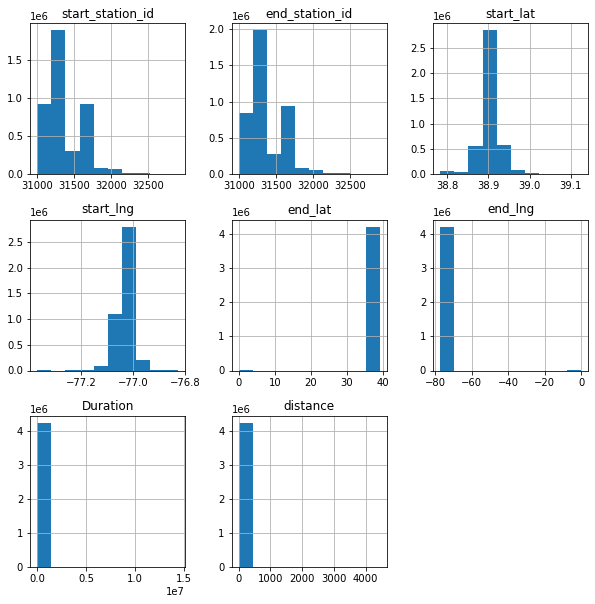

In [56]:
plt.rcParams["figure.figsize"] = (10,10)
df.hist()
plt.show()

### Some useful visualizations 

Text(0, 0.5, 'distance')

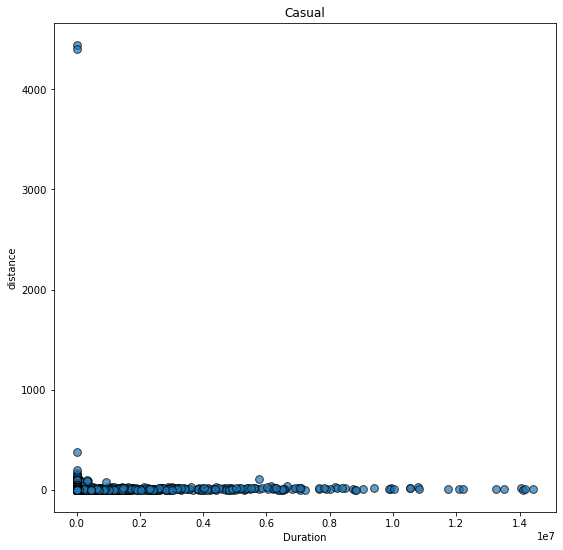

In [58]:
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Set the data 
x = df[(df.member_casual=='casual')]['Duration']

y = df[(df.member_casual=='casual')]['distance']

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Add labels 
plt.title("Casual")
plt.xlabel("Duration")
plt.ylabel("distance")


Text(0, 0.5, 'distance')

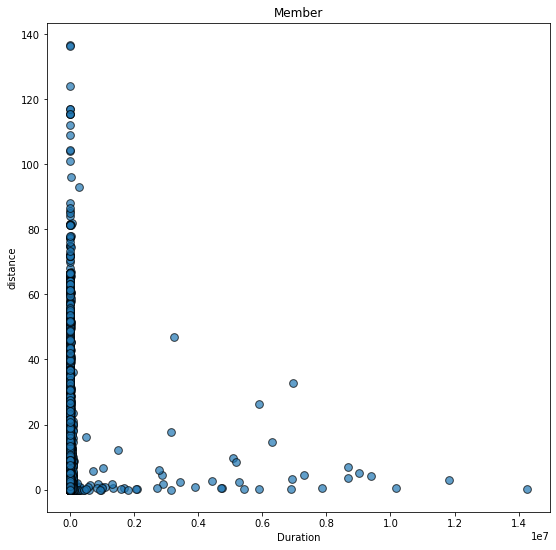

In [59]:
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Set the data 
x = df[(df.member_casual=='member')]['Duration']

y = df[(df.member_casual=='member')]['distance']

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Add labels 
plt.title("Member")
plt.xlabel("Duration")
plt.ylabel("distance")

In [60]:
#export to csv
df.to_csv( "data_vf.csv", index=False)